In [12]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the paths to the datasets
dataset_2_path = r"C:\Users\priyansh singh\Documents\GitHub\age_detection_project\table_1fdb7992-7c9a-4fb3-9504-f8cce7e0154d.csv"
dataset_3_path = r"C:\Users\priyansh singh\Documents\GitHub\age_detection_project\table_ebec359a-f771-4180-8957-42d8334d72e9.csv"

# Load the datasets
dataset_2 = pd.read_csv(dataset_2_path)
dataset_3 = pd.read_csv(dataset_3_path)

# Clean and standardize 'Smoker_Type' in both datasets
dataset_3['Smoker_Type'] = dataset_3['Smoker_Type'].str.replace('_', ' ')

# Merge the datasets
merged_data = pd.merge(dataset_3, dataset_2, on="Smoker_Type", how="left")

# Handle missing values
merged_data.fillna(merged_data.median(), inplace=True)

# Feature selection
features = merged_data[['Age', 'Smoker_Type', 'Non-natural cause', 'Respiratory disease', 'Cardiovascular disease', 'Other form of cancer', 'Lung cancer']]
target = merged_data['Proportion']  # Adjust this target based on your dataset's target feature

# Encode categorical data
features = pd.get_dummies(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Verify the splitting
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


KeyError: 'Smoker_Type'

In [14]:
import pandas as pd

# Load the dataset
dataset_3_path = r"C:\Users\priyansh singh\Documents\GitHub\age_detection_project\table_ebec359a-f771-4180-8957-42d8334d72e9.csv"
dataset_3 = pd.read_csv(dataset_3_path)

# Print column names
print(dataset_3.columns)

# Assuming the correct column name is printed, replace 'Smoker_Type' with the correct column name in your code


Index(['year', 'Heavy smoker', 'Moderate smoker', 'Light smoker',
       'Non-smoker'],
      dtype='object')


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Initialize the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


NameError: name 'X_train' is not defined

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the datasets
dataset_2_path = r"C:\Users\priyansh singh\Documents\GitHub\age_detection_project\table_1fdb7992-7c9a-4fb3-9504-f8cce7e0154d.csv"
dataset_3_path = r"C:\Users\priyansh singh\Documents\GitHub\age_detection_project\table_ebec359a-f771-4180-8957-42d8334d72e9.csv"

dataset_2 = pd.read_csv(dataset_2_path)
dataset_3 = pd.read_csv(dataset_3_path)

# Reshape dataset_3
dataset_3_melted = dataset_3.melt(id_vars=['year'], var_name='Smoker_Type', value_name='Proportion')

# Aligning column names for merging
dataset_2.rename(columns={'category': 'Smoker_Type'}, inplace=True)

# Merging datasets
merged_data = pd.merge(dataset_3_melted, dataset_2, on="Smoker_Type", how="left")

# Handling missing values properly for numerical columns
merged_data.fillna(merged_data.select_dtypes(include=['number']).median(), inplace=True)

# Encoding categorical data
features = pd.get_dummies(merged_data.drop(['Proportion'], axis=1))
target = merged_data['Proportion']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1.2584164081632732


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   0.0s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   0.0s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   0.0s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=200; total time=   0.1s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=200; total time=   0.1s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=200; total time=   0.1s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   0.0s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   0.0s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   0.0s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=200; total time=   0.1s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=200; total time=   0.1s
[CV] END .max_depth=10, min_samples_leaf=2, n_es

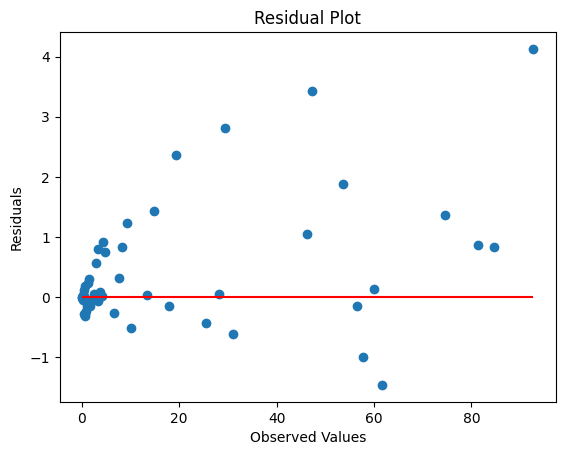

                        Feature  Importance
0                          year    0.917183
1             Non-natural cause    0.013641
2        Smoker_Type_Non-smoker    0.013623
3        Cardiovascular disease    0.013072
4                   Lung cancer    0.012588
5           Other natural cause    0.011552
6          Other form of cancer    0.007022
7           Respiratory disease    0.005592
8      Smoker_Type_Heavy smoker    0.003704
9      Smoker_Type_Light smoker    0.001348
10  Smoker_Type_Moderate smoker    0.000674


In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the datasets
dataset_2_path = r"C:\Users\priyansh singh\Documents\GitHub\age_detection_project\table_1fdb7992-7c9a-4fb3-9504-f8cce7e0154d.csv"
dataset_3_path = r"C:\Users\priyansh singh\Documents\GitHub\age_detection_project\table_ebec359a-f771-4180-8957-42d8334d72e9.csv"

dataset_2 = pd.read_csv(dataset_2_path)
dataset_3 = pd.read_csv(dataset_3_path)

# Reshape dataset_3
dataset_3_melted = dataset_3.melt(id_vars=['year'], var_name='Smoker_Type', value_name='Proportion')

# Rename column for merging
dataset_2.rename(columns={'category': 'Smoker_Type'}, inplace=True)

# Merge datasets
merged_data = pd.merge(dataset_3_melted, dataset_2, on="Smoker_Type", how="left")

# Handling missing values for numerical columns
merged_data.fillna(merged_data.select_dtypes(include=['number']).median(), inplace=True)

# Prepare features and target
features = pd.get_dummies(merged_data.drop(['Proportion'], axis=1))
target = merged_data['Proportion']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor
model = RandomForestRegressor(random_state=42)

# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Best Model
best_model = grid_search.best_estimator_

# Cross-Validation
scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated scores:", -scores)
print("Mean CV MSE:", -scores.mean())

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Residual Plot
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), colors='red')
plt.title('Residual Plot')
plt.xlabel('Observed Values')
plt.ylabel('Residuals')
plt.show()

# Feature Importance
importances = best_model.feature_importances_
feature_names = X_train.columns
feature_importances = pd.DataFrame(sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True), columns=['Feature', 'Importance'])
print(feature_importances)


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Assume 'merged_data' is already loaded and preprocessed
features = merged_data[['year', 'Smoker_Type', 'Non-natural cause', 'Respiratory disease', 'Cardiovascular disease', 'Other form of cancer', 'Lung cancer']].copy()

# Creating interaction terms correctly
features['year_smoker_interaction'] = features['year'] * features['Smoker_Type'].map({'Non-smoker': 1, 'Light smoker': 2, 'Moderate smoker': 3, 'Heavy smoker': 4}).fillna(0)

# Using PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
poly_features = poly.fit_transform(features.select_dtypes(include=[np.number]))

# Adjust for different scikit-learn versions
try:
    feature_names = poly.get_feature_names_out(features.select_dtypes(include=[np.number]).columns)
except AttributeError:
    feature_names = poly.get_feature_names(features.select_dtypes(include=[np.number]).columns)

# Creating a DataFrame from the polynomial features
poly_features_df = pd.DataFrame(poly_features, columns=feature_names)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(poly_features_df, target, test_size=0.2, random_state=42)


Mean Squared Error: 1.769063204081654


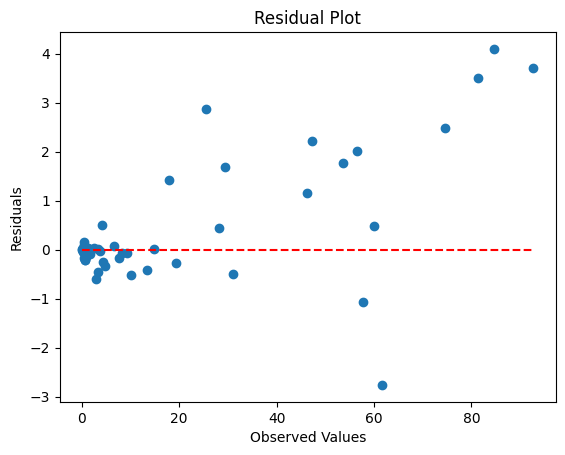

                                                importance
year                                              0.766577
year Other form of cancer                         0.133584
year year_smoker_interaction                      0.031676
Non-natural cause year_smoker_interaction         0.008753
year Non-natural cause                            0.008714
Respiratory disease year_smoker_interaction       0.007698
Lung cancer year_smoker_interaction               0.007672
year Lung cancer                                  0.006740
Cardiovascular disease year_smoker_interaction    0.006149
year Cardiovascular disease                       0.005977
Other form of cancer year_smoker_interaction      0.005167
year Respiratory disease                          0.004801
year_smoker_interaction                           0.004676
Respiratory disease Other form of cancer          0.000497
Cardiovascular disease Other form of cancer       0.000260
Cardiovascular disease Lung cancer                0.0002

<Figure size 1000x600 with 0 Axes>

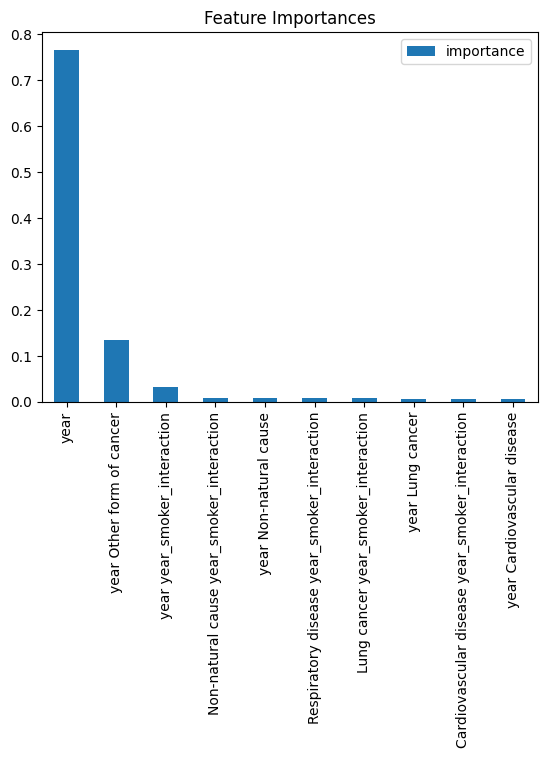

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Prediction
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Residual Plot
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), colors='red', linestyles='--')
plt.xlabel('Observed Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Feature Importances
feature_importances = pd.DataFrame(model.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

# Optionally, you can plot the feature importances for better visualization
plt.figure(figsize=(10, 6))
feature_importances[:10].plot(kind='bar')  # Top 10 features
plt.title('Feature Importances')
plt.show()


In [10]:
from sklearn.preprocessing import PolynomialFeatures

# Assuming 'features' DataFrame is already defined and includes relevant predictor variables
# Create polynomial features
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(features.select_dtypes(include=[np.number]))  # Ensure to select only numerical columns

# Create a DataFrame for the new polynomial features
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(features.select_dtypes(include=[np.number]).columns))

# Concatenate the new polynomial features with the original DataFrame (excluding original numeric features for simplicity)
enhanced_features = pd.concat([features.drop(features.select_dtypes(include=[np.number]).columns, axis=1), poly_features_df], axis=1)

# Ensure the target variable is still defined
target = merged_data['Proportion']


In [11]:
# Ensure all categorical variables are encoded
features = merged_data[['year', 'Smoker_Type', 'Non-natural cause', 'Respiratory disease', 'Cardiovascular disease', 'Other form of cancer', 'Lung cancer']]

# One-hot encode 'Smoker_Type' and other categorical features if any
features_encoded = pd.get_dummies(features, columns=['Smoker_Type'])

# Create polynomial features (assuming no categorical data remains)
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(features_encoded.select_dtypes(include=[np.number]))  # Ensure to select only numerical columns

# Create a DataFrame for the new polynomial features
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(features_encoded.select_dtypes(include=[np.number]).columns))

# Concatenate the new polynomial features with the original DataFrame (excluding original numeric features for simplicity)
enhanced_features = pd.concat([features_encoded.drop(features_encoded.select_dtypes(include=[np.number]).columns, axis=1), poly_features_df], axis=1)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(enhanced_features, target, test_size=0.2, random_state=42)

# Training Gradient Boosting Machine
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)

# Making predictions
y_pred_gbm = gbm.predict(X_test)

# Calculate MSE
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
print("Mean Squared Error for GBM:", mse_gbm)


NameError: name 'GradientBoostingRegressor' is not defined

In [12]:
print(X_train.head())


     Smoker_Type_Heavy smoker  Smoker_Type_Light smoker  \
228                     False                     False   
208                     False                     False   
96                      False                     False   
167                     False                      True   
84                      False                     False   

     Smoker_Type_Moderate smoker  Smoker_Type_Non-smoker  year  \
228                        False                    True  75.0   
208                        False                    True  55.0   
96                          True                   False  65.0   
167                        False                   False  75.0   
84                          True                   False  53.0   

     Non-natural cause  Respiratory disease  Cardiovascular disease  \
228                0.5                  0.2                     1.4   
208                0.5                  0.2                     1.4   
96                 1.0             

Mean Squared Error: 2.0130468925680183
                                       Feature  Importance
0                                         year    0.336488
1                                       year^2    0.286836
2                  year^2 Other form of cancer    0.169996
3                                       year^3    0.119970
4                           year^2 Lung cancer    0.022037
5  year Non-natural cause Other form of cancer    0.020721
6                   year^2 Respiratory disease    0.008368
7                year^2 Cardiovascular disease    0.006364
8                     year^2 Non-natural cause    0.005588
9                             year Lung cancer    0.005546


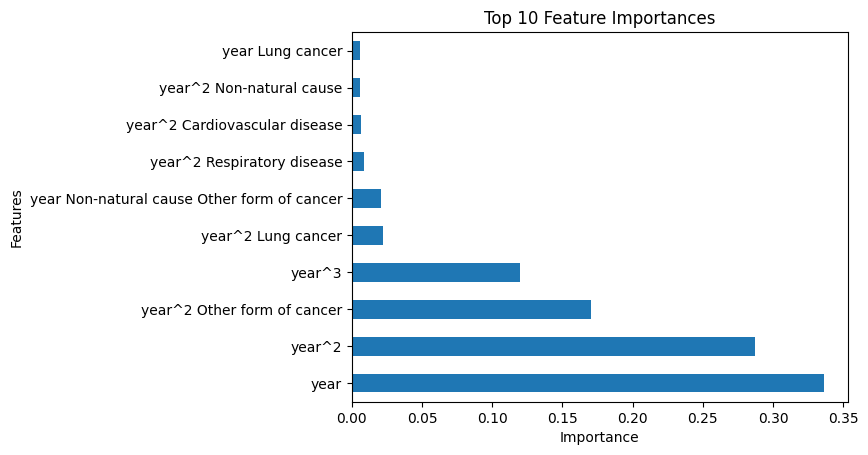

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Assuming X_train, y_train, X_test, y_test are already defined
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Feature importance
importances = gbm.feature_importances_
feature_names = X_train.columns
feature_importances = pd.DataFrame(sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True), columns=['Feature', 'Importance'])
print(feature_importances.head(10))  # Show top 10 features

# Optionally plot the feature importances for visual representation
import matplotlib.pyplot as plt
feature_importances.head(10).plot(kind='barh', x='Feature', y='Importance', legend=None)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [14]:
from sklearn.model_selection import cross_val_score

# Performing cross-validation
cv_scores = cross_val_score(gbm, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("CV Mean Squared Error: ", -np.mean(cv_scores))


CV Mean Squared Error:  4.572482655651263


In [15]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Setup the parameters and distributions to sample from: Corrected for GradientBoostingRegressor
param_dist = {
    "max_depth": [3, 5, 7, None],  # Adjust depths for more variety
    "max_features": ['sqrt', 'log2', None],  # Options for the number of features to consider
    "min_samples_split": sp_randint(2, 11),
    "min_samples_leaf": sp_randint(1, 11),
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2]  # Learning rate to control the contribution of each tree
}

# Initialize the Gradient Boosting Regressor
gbm = GradientBoostingRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(gbm, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Check if best_params_ is found
if hasattr(random_search, 'best_params_'):
    print("Best Parameters:", random_search.best_params_)
    # Re-train the model with the best parameters
    optimized_gbm = GradientBoostingRegressor(**random_search.best_params_, random_state=42)
    optimized_gbm.fit(X_train, y_train)

    # Make predictions with the optimized model
    optimized_y_pred = optimized_gbm.predict(X_test)

    # Calculate the new MSE with the optimized model
    optimized_mse = mean_squared_error(y_test, optimized_y_pred)
    print("Optimized Mean Squared Error:", optimized_mse)
else:
    print("Randomized search did not find the best parameters.")


Best Parameters: {'learning_rate': 0.2, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 200}
Optimized Mean Squared Error: 1.6111343540666687


<Figure size 1000x600 with 0 Axes>

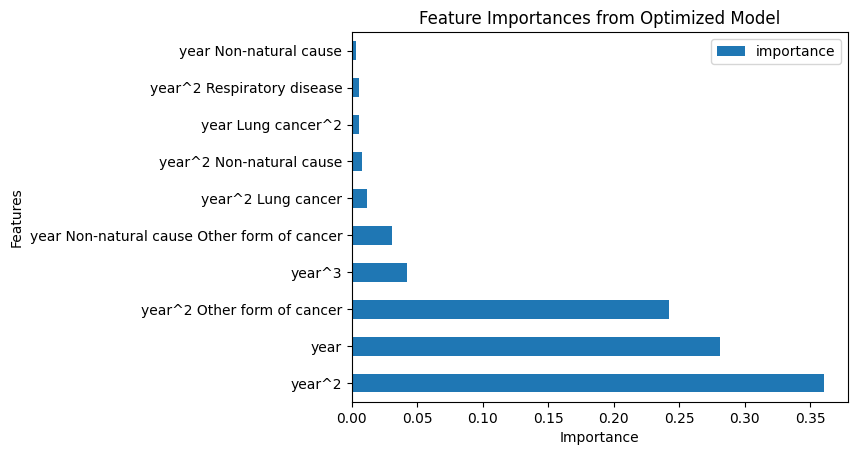

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Retrieve feature importances from the optimized model
feature_importances = pd.DataFrame(optimized_gbm.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
feature_importances.head(10).plot(kind='barh')  # Display top 10 features
plt.title('Feature Importances from Optimized Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [17]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# Redefine your optimized Gradient Boosting Regressor with known best parameters
# Replace the dictionary below with your actual best parameters
best_params = {
    'learning_rate': 0.2,
    'max_depth': None,
    'max_features': None,
    'min_samples_leaf': 8,
    'min_samples_split': 4,
    'n_estimators': 200
}

optimized_gbm = GradientBoostingRegressor(**best_params, random_state=42)
optimized_gbm.fit(X_train, y_train)

# Now perform cross-validation
scores = cross_val_score(optimized_gbm, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print("Cross-validated MSE: ", -scores.mean())


Cross-validated MSE:  3.585425789797166


In [22]:
pip install shap


   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.7 MB 932.9 kB/s eta 0:00:03
   ------- -------------------------------- 0.5/2.7 MB 932.9 kB/s eta 0:00:03
   ----------- ---------------------------- 0.8/2.7 MB 932.9 kB/s eta 0:00:03
   --------------- ------------------------ 1.0/2.7 MB 949.8 kB/s eta 0:00:02
   ------------------- -------------------- 1.3/2.7 MB 1.0 MB/s eta 0:00:02
   ----------------------- ---------------- 1.6/2.7 MB 1.0 MB/s eta 0:00:02
   --------------------------- ------------ 1.8/2.7 MB 1.0 MB/s eta 0:00:01
   ------------------------------ --------- 2.1/2.7 MB 1.0 MB/s eta 0:00:01
   ------------------------------ --------- 2.1/2.7 MB 1.0 MB/s eta 0:00:01
   ---------------------------------- ----- 2.4/2.7 MB 986.9 kB/s eta 0:00:01
   --------------------

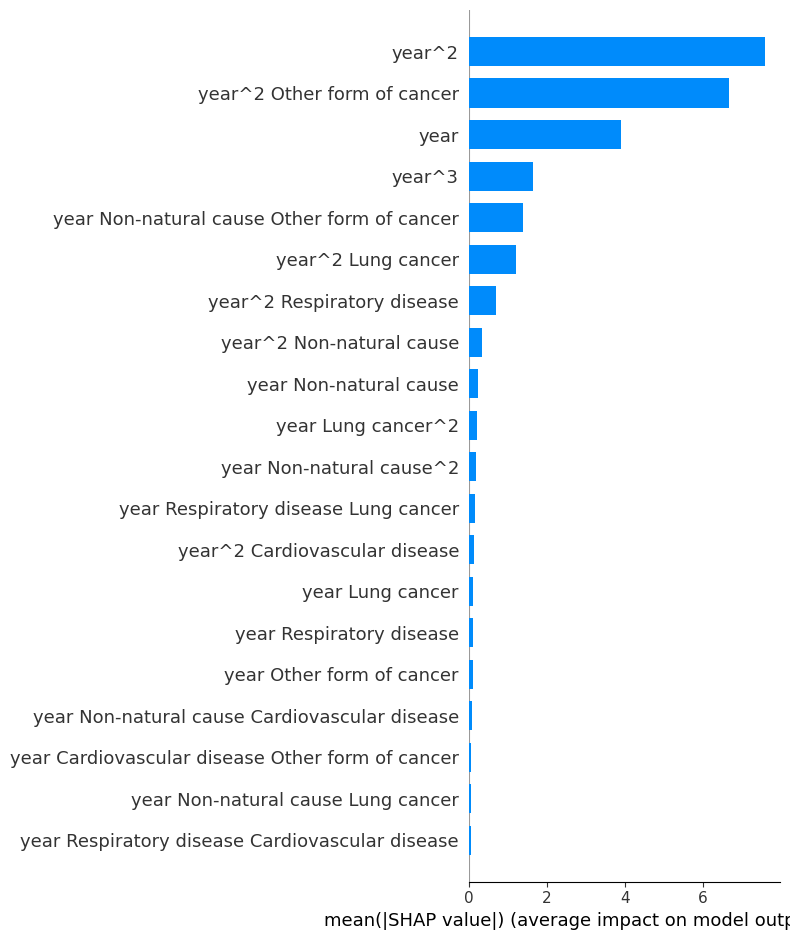

In [23]:
import shap

# Assuming your model and X_train are already defined and available
explainer = shap.TreeExplainer(optimized_gbm)
shap_values = explainer.shap_values(X_train)

# Visualize the SHAP values for the first 10 observations
shap.summary_plot(shap_values, X_train, plot_type="bar")
